## Model Machine Learning Predict: PCA and Logistic Regression.

Applying PCA and Logistic Regression to data industrial machines to provide maintenance.



Dataset: ficticius data sensors machine - 1000 rows with target.

In [148]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings('ignore')

In [149]:
np.random.seed(42)  

In [150]:
### Fictius dataset
data = np.random.randn(1000, 8)
df_data = pd.DataFrame(data, columns=[f'Attribute_{i}' for i in range (1,9)])

In [151]:
df_data.shape

(1000, 8)

In [152]:
df_data.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861


In [153]:
## Standardizer
df_scaler = StandardScaler()

In [154]:
df_standardized = df_scaler.fit_transform(df_data)

In [155]:
df_standardized

array([[ 0.50005258, -0.1079961 ,  0.69137884, ..., -0.2174599 ,
         1.54266063,  0.72124761],
       [-0.46570918,  0.57203085, -0.43181987, ..., -1.87318757,
        -1.65304186, -0.57797922],
       [-1.00882591,  0.34398554, -0.88126503, ..., -0.20921584,
         0.08058337, -1.42066048],
       ...,
       [-0.98387173,  0.75229737,  0.12308532, ..., -0.48368659,
        -0.05519563,  1.81736367],
       [ 0.24162393, -0.8096809 ,  0.25967332, ...,  0.5858837 ,
         1.18481977, -0.05231653],
       [ 1.6417944 ,  0.93706544, -0.67849748, ..., -0.81006669,
         1.61394232,  2.00153949]])

In [156]:
### PCA redution dimension
df_pca = PCA()

In [157]:
df_pca = df_pca.fit_transform(df_standardized)

In [158]:
### PCA redution dimension
pca = PCA()
X_pca = pca.fit_transform(df_standardized)

In [160]:
variance_explained_ratio = pca.explained_variance_ratio_
variance_explained_ratio

array([0.1409125 , 0.13238103, 0.1307604 , 0.12946748, 0.12256327,
       0.12096314, 0.11395785, 0.10899434])

In [161]:
cumulative_variance_ratio = np.cumsum(variance_explained_ratio)


In [162]:
print('Proportion of variance explained by each component:\n\n', variance_explained_ratio)

Proportion of variance explained by each component:

 [0.1409125  0.13238103 0.1307604  0.12946748 0.12256327 0.12096314
 0.11395785 0.10899434]


In [163]:
print('Accumulated variance:\n\n', cumulative_variance_ratio)

Accumulated variance:

 [0.1409125  0.27329352 0.40405392 0.5335214  0.65608467 0.77704781
 0.89100566 1.        ]


In [166]:
# Ajustar o range para começar de 1
components = range(1, len(variance_explained_ratio) + 1)

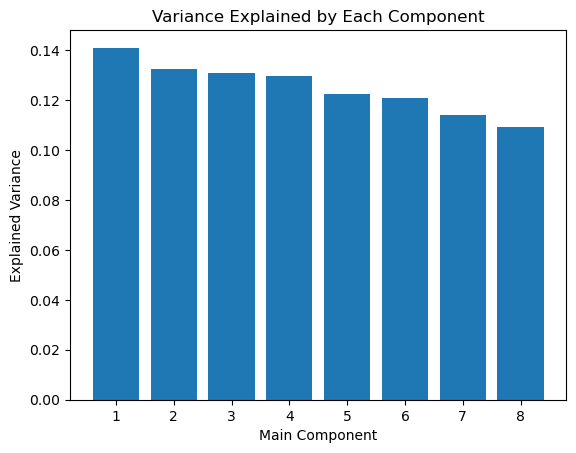

In [170]:
# Plot
plt.bar(components, variance_explained_ratio)

# Ajustar os ticks no eixo x
plt.xticks(components)

plt.xlabel('Main Component')
plt.ylabel('Explained Variance')
plt.title('Variance Explained by Each Component')
plt.show()

In [171]:
## Extracting main components
components = pd.DataFrame(pca.components_ , columns=df_data.columns, index=[f'PC-{i}' for i in range(1,9)])

In [172]:
components

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8
PC-1,-0.196388,0.468139,-0.405046,-0.417747,0.436951,-0.448249,0.010965,0.108297
PC-2,-0.275254,0.406774,-0.350551,0.470875,-0.485621,-0.042320,0.420036,-0.010603
PC-3,0.389133,-0.176295,-0.305869,-0.250275,0.137979,0.371768,0.654928,0.274085
PC-4,0.542503,0.297805,0.009931,-0.296110,-0.291527,-0.101594,0.043470,-0.657285
PC-5,-0.263291,-0.017466,-0.357604,0.145364,0.401602,0.537062,-0.112864,-0.564716
PC-6,0.446916,-0.310198,-0.585621,0.388296,0.030855,-0.316280,-0.325487,0.058223
PC-7,-0.265614,-0.548444,0.058386,-0.008642,0.092213,-0.495751,0.462134,-0.396654
PC-8,0.316742,0.313520,0.380994,0.530533,0.546333,-0.120463,0.245726,-0.037217


In [173]:
### Creating target variable
df_data['target'] = np.random.randint(0, 2, df_data.shape[0])

In [174]:
df_data.head()

,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,1
1,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,0
2,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,1
3,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278,1
4,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0


In [175]:
scores = []

In [176]:
# Loop over the number of PCA components from 1 to 8
for i in range(1, 9):
    
    # Create a PCA object with i components
    pca = PCA(n_components = i)
    
    # Fit PCA to scaled data and transform the data
    pca_data = pca.fit_transform(df_standardized)
    
    # Create a logistic regression object
    lr = LogisticRegression()
    
    # Evaluate logistic regression using cross-validation and average scores
    score = cross_val_score(lr, pca_data, df_data['target'], cv = 5).mean()
    
    # Adds the average scores to the scores list
    scores.append(score)

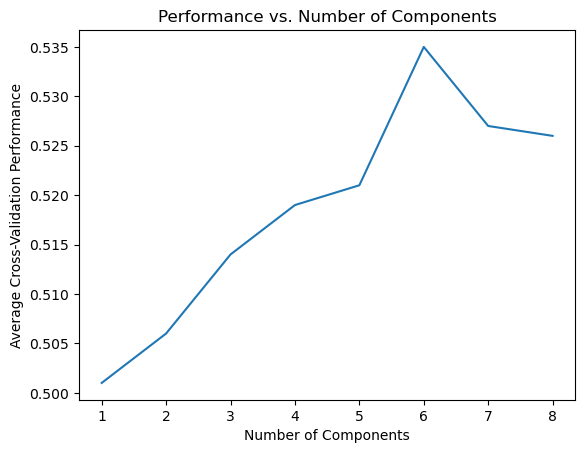

In [177]:
# Plot
plt.plot(range(1, 9), scores)
plt.xlabel('Number of Components')
plt.ylabel('Average Cross-Validation Performance')
plt.title('Performance vs. Number of Components')
plt.show()

In [178]:
### Cross Validation
len(df_pca)

1000

In [179]:
# Applying LOOCV
df_loo = LeaveOneOut()
df_lr = LogisticRegression()
scores_loo = cross_val_score(df_lr, pca_data, df_data['target'], cv = df_loo)
print(f"LOOCV Score: {scores_loo.mean()}")

LOOCV Score: 0.523


In [180]:
## Final Model with 6 components
pca_final = PCA(n_components = 6)
pca_data_final = pca_final.fit_transform(df_standardized)
modelo_lr_final = LogisticRegression()
modelo_lr_final.fit(pca_data_final, df_data['target'])

LogisticRegression()

In [181]:
# Simulation new data sensors
new_data_sensors = np.random.randn(1, 8)

In [182]:
new_data_sensors

array([[ 0.63122436, -1.15122666,  1.1049972 , -0.37753115,  1.25761311,
        -0.53345245, -1.02662548, -0.45813699]])

In [183]:
# Standardizes input data
new_data_standardized = df_scaler.transform(new_data_sensors)
new_data_standardized

array([[ 0.63450337, -1.11977206,  1.15366453, -0.35976635,  1.22465723,
        -0.51260144, -0.97766463, -0.47621724]])

In [184]:
### Apply PCA
pca_new_data = pca_final.transform(new_data_standardized)

In [185]:
# Forecasting with new data
forecast = modelo_lr_final.predict(pca_new_data)
print(forecast)

[1]


According to the input data, this machine needs preventive maintenance.